In [12]:
#引入库
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn.functional as F
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [13]:
#查看数据
# filename = 'fashion-mnist_test.csv'
# csv_path = os.path.abspath(filename)
# csv_path = r"C:\Users\14282\OneDrive\桌面\fasion_mnist\fashion-mnist_test.csv"
# df = pd.read_csv(csv_path)
# df.head()

In [14]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))
])

In [15]:
#datasets 
class Fasion_Mnist(Dataset):
    def __init__(self, csv_path, transform=None):
        df = pd.read_csv(csv_path)
        label = df.iloc[:, 0].values
        train_set = df.iloc[:, 1:].values.astype(np.uint8).reshape(len(label), 28, 28)
        self.train_set = train_set
        self.label = label
        self.transform = transform                                    
    def __getitem__(self, index):
        img = self.train_set[index]
        target = int(self.label[index])
        if self.transform is not None:
            img = self.transform(img)
        target = torch.tensor(target, dtype=torch.long)
        return img, target
    def __len__(self):
        return len(self.train_set)

In [16]:
train_dataset = Fasion_Mnist(r"C:\Users\14282\OneDrive\桌面\fasion_mnist\fashion-mnist_train.csv", transform=transform)
test_dataset = Fasion_Mnist(r"C:\Users\14282\OneDrive\桌面\fasion_mnist\fashion-mnist_test.csv", transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [17]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 6, 3),
            torch.nn.MaxPool2d(2, 2)
        )
        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(6, 16, 3),
            torch.nn.MaxPool2d(2,2)
        )
        self.fc = torch.nn.Sequential(
            torch.nn.Linear(400, 120),
            torch.nn.Linear(120, 84),
            torch.nn.Linear(84, 10)
        )
        
    def forward(self, x):
        batch_size = x.size(0)
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(batch_size, -1)
        x = self.fc(x)
        return x
model = Net()

In [18]:
criterion = torch.nn.CrossEntropyLoss()

In [19]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.5)

In [20]:
def train(epoch):
    running_loss = 0.0
    running_total = 0
    running_correct = 0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        
        # import pdb; pdb.set_trace() 
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, dim=1)
        running_total += inputs.shape[0]
        running_correct += (predicted == target).sum().item()
        
        if batch_idx % 100 == 99:
            print(f'[{epoch + 1}, {batch_idx + 1:5d}]: loss: {running_loss / 100:.3f}, acc: {100 * running_correct / running_total:.2f}%')
            running_loss = 0.0  
            running_total = 0
            running_correct = 0  
        

In [21]:
def test():
    correct = 0
    total = 0
    with torch.no_grad(): 
        for data in test_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, dim=1)  
            total += labels.size(0) 
            correct += (predicted == labels).sum().item()
    
    acc = correct / total
    return acc

[1,   100]: loss: 2.277, acc: 12.76%
[1,   200]: loss: 2.225, acc: 30.24%
[1,   300]: loss: 2.142, acc: 39.41%
[1,   400]: loss: 1.993, acc: 47.61%
[2,   100]: loss: 1.495, acc: 60.20%
[2,   200]: loss: 1.207, acc: 62.63%
[2,   300]: loss: 1.048, acc: 64.89%
[2,   400]: loss: 0.967, acc: 66.92%
[3,   100]: loss: 0.883, acc: 68.50%
[3,   200]: loss: 0.859, acc: 69.09%
[3,   300]: loss: 0.833, acc: 70.37%
[3,   400]: loss: 0.821, acc: 71.12%
[4,   100]: loss: 0.762, acc: 72.47%
[4,   200]: loss: 0.758, acc: 72.49%
[4,   300]: loss: 0.753, acc: 72.77%
[4,   400]: loss: 0.742, acc: 73.14%
[5,   100]: loss: 0.714, acc: 73.96%
[5,   200]: loss: 0.701, acc: 74.38%
[5,   300]: loss: 0.699, acc: 74.69%
[5,   400]: loss: 0.698, acc: 74.66%
[6,   100]: loss: 0.669, acc: 75.83%
[6,   200]: loss: 0.681, acc: 75.17%
[6,   300]: loss: 0.648, acc: 75.99%
[6,   400]: loss: 0.662, acc: 75.72%
[7,   100]: loss: 0.650, acc: 75.77%
[7,   200]: loss: 0.622, acc: 76.84%
[7,   300]: loss: 0.633, acc: 77.19%
[

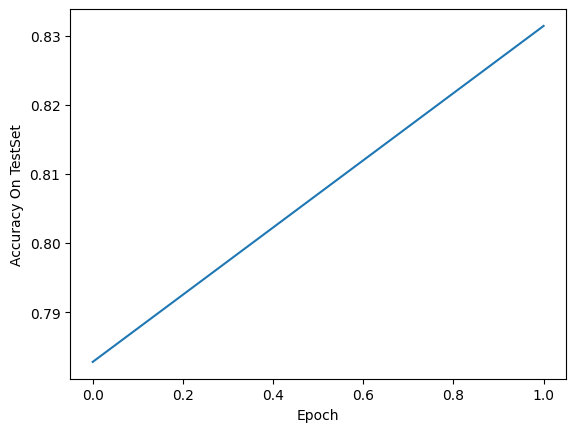

In [22]:
EPOCH = 20
if __name__ == '__main__':
    acc_list_test = []
    for epoch in range(EPOCH):
        train(epoch)
        if epoch % 10 == 9:  #每训练10轮 测试1次
            acc_test = test()
            acc_list_test.append(acc_test)

    plt.plot(acc_list_test)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy On TestSet')
    plt.show()